In [ ]:
!pip install tensorflow

In [94]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
bike = pd.read_csv("seoulbikedata.csv", encoding='latin1')

In [10]:
bike

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [19]:
bike[::]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [102]:
#checking for the number of unique values
#checkinf for the number of nan in each column
for col in bike.columns:
    print(bike[col].unique()[:5])
    print(bike[col].nunique())
    print(bike[col].isna().sum())

['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017']
365
0
[254 204 173 107  78]
2166
0
[0 1 2 3 4]
24
0
[-5.2 -5.5 -6.  -6.2 -6.4]
546
0
[37 38 39 40 36]
90
0
[2.2 0.8 1.  0.9 2.3]
65
0
[2000 1928 1996 1936  793]
1789
0
[-17.6 -17.7 -18.6 -18.7 -19.5]
556
0
[0.   0.01 0.23 0.65 0.94]
345
0
[0.  0.5 1.  2.5 0.1]
61
0
[0.  0.1 0.3 0.4 0.2]
51
0
['Winter' 'Spring' 'Summer' 'Autumn']
4
0
['No Holiday' 'Holiday']
2
0
['Yes' 'No']
2
0


<Axes: xlabel='Rented Bike Count', ylabel='Count'>

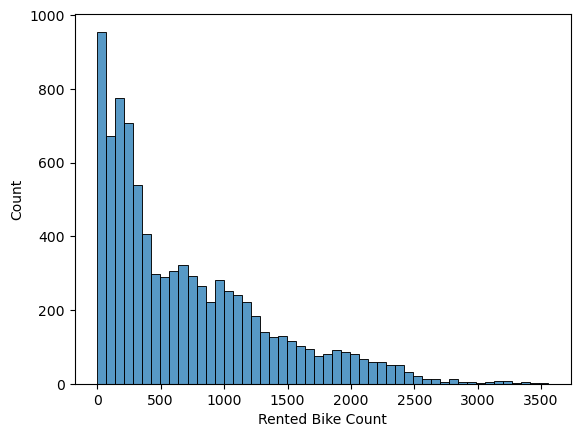

In [96]:
#Exploratory data analysis
sns.histplot(bike['Rented Bike Count'], bins = 50)

In [101]:
bike.isna()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
#calculating correlation coefficient to determine correlation.

numeric_columns = bike.select_dtypes(include='number').columns
correlations = bike[numeric_columns].corr()["Rented Bike Count"].abs().sort_values(ascending=False)
print(correlations)



Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Humidity(%)                  0.199780
Visibility (10m)             0.199280
Snowfall (cm)                0.141804
Rainfall(mm)                 0.123074
Wind speed (m/s)             0.121108
Name: Rented Bike Count, dtype: float64


In [58]:
training_data_len = int(len(bike) * 0.8)
test_data_len = len(bike) - training_data_len

In [59]:
training_data = bike[:training_data_len]
test_data = bike[training_data_len + 1:]

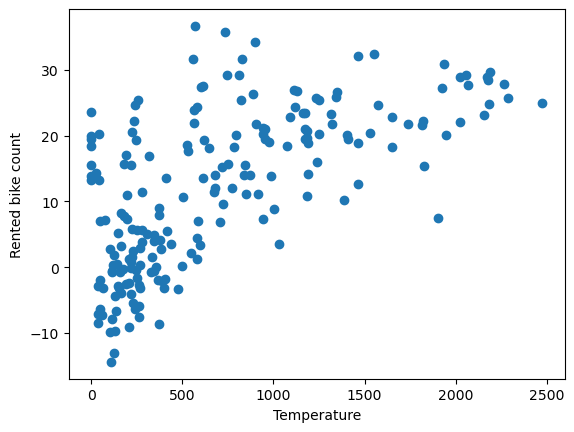

In [84]:
#Plotting the relationships

sampledata = bike.sample(n=200)
plt.xlabel("Temperature")
plt.ylabel("Rented bike count")

plt.scatter(sampledata['Rented Bike Count'], sampledata['Temperature(°C)'])
plt.show()

In [61]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model 

In [62]:
def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return trained_weight,trained_bias, epochs, rmse, history.history 

In [77]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_data.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias 
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

In [64]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [91]:
learning_rate = 0.001
epochs = 100
batch_size = 200

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "Wind speed (m/s)"    # the median income on a specific city block.
my_label = "Rented Bike Count" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.




In [92]:
my_model = build_model(learning_rate)
weight, bias, epochs, rmse, history = train_model(my_model, training_data, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

Epoch 1/100
29/29 [==============================] - 1s 9ms/step - loss: 806806.4375 - root_mean_squared_error: 898.2241 - val_loss: 1301508.8750 - val_root_mean_squared_error: 1140.8369
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 806691.4375 - root_mean_squared_error: 898.1600 - val_loss: 1301355.1250 - val_root_mean_squared_error: 1140.7695
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 806583.7500 - root_mean_squared_error: 898.1001 - val_loss: 1301203.6250 - val_root_mean_squared_error: 1140.7031
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 806476.6875 - root_mean_squared_error: 898.0405 - val_loss: 1301049.3750 - val_root_mean_squared_error: 1140.6355
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 806368.9375 - root_mean_squared_error: 897.9805 - val_loss: 1300894.3750 - val_root_mean_squared_error: 1140.5676
Epoch 6/100
29/29 [==============================] - 0s 3ms/step 

Epoch 45/100
29/29 [==============================] - 0s 3ms/step - loss: 802099.3125 - root_mean_squared_error: 895.6000 - val_loss: 1294825.5000 - val_root_mean_squared_error: 1137.9041
Epoch 46/100
29/29 [==============================] - 0s 3ms/step - loss: 801992.5000 - root_mean_squared_error: 895.5403 - val_loss: 1294671.7500 - val_root_mean_squared_error: 1137.8364
Epoch 47/100
29/29 [==============================] - 0s 3ms/step - loss: 801885.4375 - root_mean_squared_error: 895.4806 - val_loss: 1294516.2500 - val_root_mean_squared_error: 1137.7681
Epoch 48/100
29/29 [==============================] - 0s 3ms/step - loss: 801778.5000 - root_mean_squared_error: 895.4208 - val_loss: 1294369.0000 - val_root_mean_squared_error: 1137.7034
Epoch 49/100
29/29 [==============================] - 0s 3ms/step - loss: 801673.0625 - root_mean_squared_error: 895.3620 - val_loss: 1294218.6250 - val_root_mean_squared_error: 1137.6373
Epoch 50/100
29/29 [==============================] - 0s 3ms

29/29 [==============================] - 0s 3ms/step - loss: 797541.0000 - root_mean_squared_error: 893.0515 - val_loss: 1288327.5000 - val_root_mean_squared_error: 1135.0452
Epoch 89/100
29/29 [==============================] - 0s 3ms/step - loss: 797435.2500 - root_mean_squared_error: 892.9923 - val_loss: 1288173.2500 - val_root_mean_squared_error: 1134.9772
Epoch 90/100
29/29 [==============================] - 0s 3ms/step - loss: 797328.0000 - root_mean_squared_error: 892.9323 - val_loss: 1288022.0000 - val_root_mean_squared_error: 1134.9105
Epoch 91/100
29/29 [==============================] - 0s 3ms/step - loss: 797222.9375 - root_mean_squared_error: 892.8734 - val_loss: 1287869.3750 - val_root_mean_squared_error: 1134.8434
Epoch 92/100
29/29 [==============================] - 0s 3ms/step - loss: 797116.6250 - root_mean_squared_error: 892.8139 - val_loss: 1287721.2500 - val_root_mean_squared_error: 1134.7781
Epoch 93/100
29/29 [==============================] - 0s 3ms/step - loss:

C:\Users\Leke\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


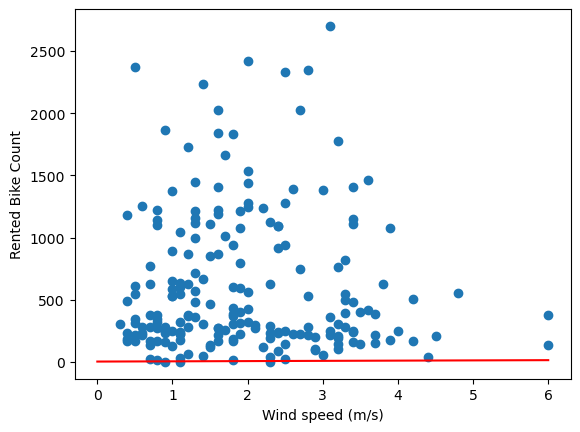

In [93]:
plot_the_model(weight, bias, my_feature, my_label)
#plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
 #                   history["val_root_mean_squared_error"])